# Web Site Visits Analysis Project
## Introduction
This project aims to analyze web site visits data to derive insights into user behavior, trends, and engagement patterns. The dataset contains information about various aspects of web site visits, such as day of the week, page loads, unique visits, first-time visits, and returning visits.

#### Data preparation.
Importing data and preparing for analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px


In [2]:
df = pd.read_csv('../data/daily-website-visitors.csv')
df.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236


In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayMonth'] = df['Date'].dt.day

replace_ch = {',': ''}
for col in ['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']:
    df[col] = df[col].str.replace(',', '')
    df[col] = pd.to_numeric(df[col])

df.head(3)

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits,Year,Month,DayMonth
0,1,Sunday,1,2014-09-14,2146,1582,1430,152,2014,9,14
1,2,Monday,2,2014-09-15,3621,2528,2297,231,2014,9,15
2,3,Tuesday,3,2014-09-16,3698,2630,2352,278,2014,9,16


## Exploratory Data Analysis (EDA)
#### Basic Statistics
Performed exploratory data analysis to understand the distribution and characteristics of the dataset. Calculated basic statistics, such as mean, median, and standard deviation, for each relevant column.

In [4]:
df.iloc[:, 1:].describe()

,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits,Year,Month,DayMonth
count,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.00000,2167.000000,2167.000000
mean,3.997231,4116.989386,2943.646516,2431.824181,511.822335,2017.16982,6.498846,15.730964
std,2.000229,1350.977843,977.886472,828.704688,168.736370,1.75318,3.462485,8.789635
min,1.000000,1002.000000,667.000000,522.000000,133.000000,2014.00000,1.000000,1.000000
25%,2.000000,3114.500000,2226.000000,1830.000000,388.500000,2016.00000,3.500000,8.000000
50%,4.000000,4106.000000,2914.000000,2400.000000,509.000000,2017.00000,6.000000,16.000000
75%,6.000000,5020.500000,3667.500000,3038.000000,626.500000,2019.00000,10.000000,23.000000
max,7.000000,7984.000000,5541.000000,4616.000000,1036.000000,2020.00000,12.000000,31.000000


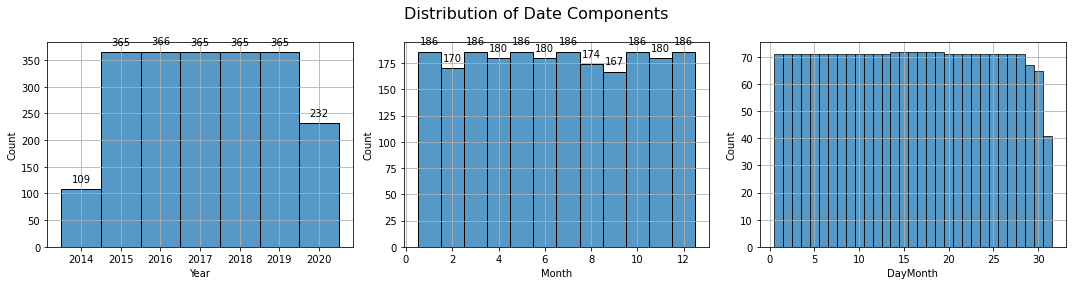

In [5]:
fig, ax = plt.subplots(1,3, figsize=(15,4))
sns.histplot(data=df, x='Year', bins=range(df['Year'].min(), df['Year'].max()), ax=ax[0], discrete=True)
sns.histplot(data=df, x='Month', bins=range(1, 13), ax=ax[1], discrete=True)
sns.histplot(data=df, x='DayMonth', bins=range(1, 32), ax=ax[2], discrete=True)

# Add grid to all subplots
for axis in ax:
    axis.grid(True)
# Annotate bars
for i, axis in enumerate(ax):
    for p in axis.patches:
        axis.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    if i==1:
        break
fig.suptitle('Distribution of Date Components', fontsize=16)
plt.tight_layout()
plt.show()

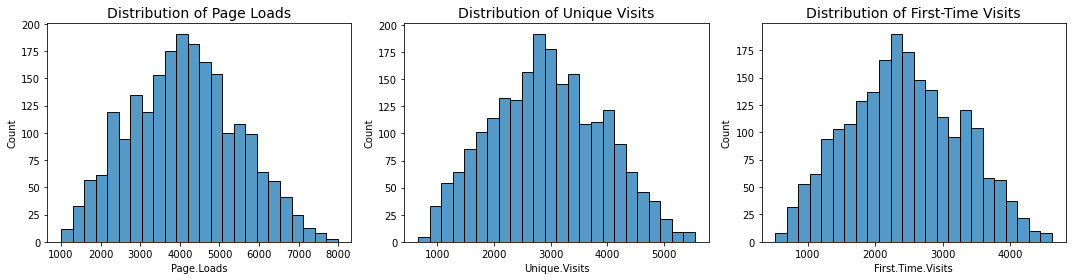

In [6]:
fig, ax = plt.subplots(1,3, figsize=(15,4))
sns.histplot(data=df, x='Page.Loads', bins=24, ax=ax[0])
sns.histplot(data=df, x='Unique.Visits', bins=24, ax=ax[1])
sns.histplot(data=df, x='First.Time.Visits', bins=24, ax=ax[2])
ax[0].set_title('Distribution of Page Loads', fontsize=14)
ax[1].set_title('Distribution of Unique Visits', fontsize=14)
ax[2].set_title('Distribution of First-Time Visits', fontsize=14)
plt.tight_layout()
plt.show()

95% Confidence Interval for Mean Unique Visits: (2902.45, 2984.84)


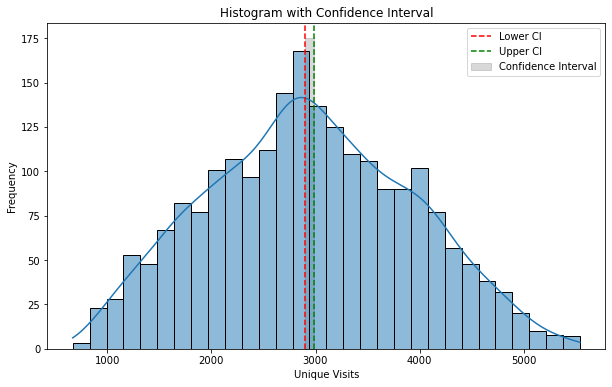

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t

confidence_level = 0.95
mean_sample = df['Unique.Visits'].mean()
std_sample = df['Unique.Visits'].std()
sample_size = len(df['Unique.Visits'])

margin_of_error = t.ppf((1 + confidence_level) / 2, df=sample_size - 1) * (std_sample / (sample_size ** 0.5))
confidence_interval = (mean_sample - margin_of_error, mean_sample + margin_of_error)

print(f"95% Confidence Interval for Mean Unique Visits: {tuple(round(ci, 2) for ci in confidence_interval)}")

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Unique.Visits', bins=30, kde=True, kde_kws={'bw_adjust': 1})

# Adding vertical lines for the confidence interval
plt.axvline(x=confidence_interval[0], color='red', linestyle='--', label='Lower CI')
plt.axvline(x=confidence_interval[1], color='green', linestyle='--', label='Upper CI')

# Fill between the confidence interval lines
plt.fill_betweenx(y=[0, 175], x1=confidence_interval[0], x2=confidence_interval[1], color='gray', alpha=0.3, label='Confidence Interval')

plt.title('Histogram with Confidence Interval')
plt.xlabel('Unique Visits')
plt.ylabel('Frequency')
plt.legend()
plt.show()
# Compare CI by period

95% Confidence Interval for Mean Unique Visits in Year 2014: (2423.27, 2762.62)
95% Confidence Interval for Mean Unique Visits in Year 2015: (2809.17, 3007.58)
95% Confidence Interval for Mean Unique Visits in Year 2016: (3093.84, 3306.71)
95% Confidence Interval for Mean Unique Visits in Year 2017: (2377.59, 2546.39)
95% Confidence Interval for Mean Unique Visits in Year 2018: (2949.85, 3160.42)
95% Confidence Interval for Mean Unique Visits in Year 2019: (2956.93, 3154.73)
95% Confidence Interval for Mean Unique Visits in Year 2020: (3060.42, 3269.42)


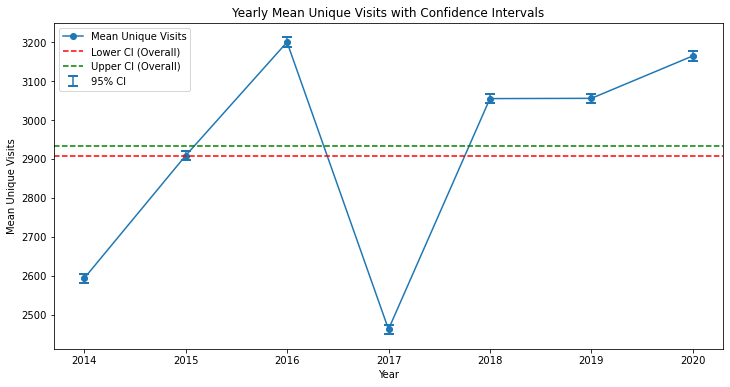

In [10]:
# del
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

# Set the confidence level
confidence_level = 0.95

# Group data by month
grouped_data = df.groupby('Year')['Unique.Visits']

# Create empty lists to store means, standard deviations, and sample sizes
means = []
stds = []
sizes = []

# Iterate over each month
for name, group_data in grouped_data:
    # Calculate mean, standard deviation, and sample size for each month
    mean_sample = group_data.mean()
    std_sample = group_data.std()
    sample_size = len(group_data)

    # Calculate margin of error and confidence interval
    margin_of_error = t.ppf((1 + confidence_level) / 2, df=sample_size - 1) * (std_sample / (sample_size ** 0.5))
    confidence_interval = (mean_sample - margin_of_error, mean_sample + margin_of_error)

    # Append the results to the lists
    means.append(mean_sample)
    stds.append(std_sample)
    sizes.append(sample_size)

    # Print confidence intervals for each month
    print(f"95% Confidence Interval for Mean Unique Visits in Year {name}: {tuple(round(ci, 2) for ci in confidence_interval)}")

# Calculate aggregated confidence interval over all months
overall_mean = np.mean(means)
overall_std = np.std(means, ddof=1)
overall_size = sum(sizes)

overall_margin_of_error = t.ppf((1 + confidence_level) / 2, df=overall_size - 1) * (overall_std / (overall_size ** 0.5))
overall_confidence_interval = (overall_mean - overall_margin_of_error, overall_mean + overall_margin_of_error)

# Plotting
plt.figure(figsize=(12, 6))

# Plotting means
plt.plot(df['Year'].unique(), means, marker='o', label='Mean Unique Visits')

# Plotting error bars for confidence intervals
plt.errorbar(df['Year'].unique(), means, yerr=overall_margin_of_error, fmt='none', capsize=5, capthick=2, label='95% CI')

# Adding a horizontal line for the overall confidence interval
plt.axhline(y=overall_confidence_interval[0], linestyle='--', color='red', label='Lower CI (Overall)')
plt.axhline(y=overall_confidence_interval[1], linestyle='--', color='green', label='Upper CI (Overall)')

plt.title('Yearly Mean Unique Visits with Confidence Intervals')
plt.xlabel('Year')
plt.ylabel('Mean Unique Visits')
plt.legend()
plt.show()


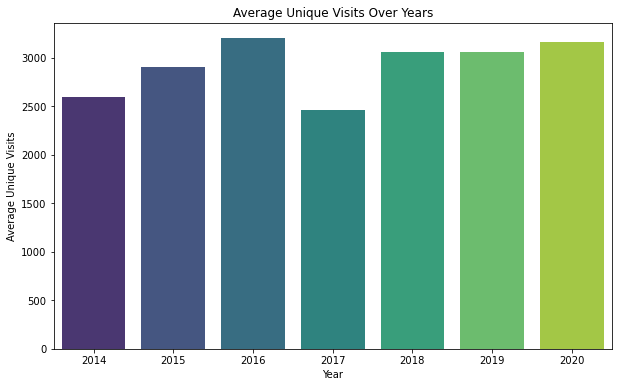

In [30]:
grouped_data = df.groupby('Year')['Unique.Visits'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='Year', y='Unique.Visits', palette='viridis')
plt.title('Average Unique Visits Over Years')
plt.xlabel('Year')
plt.ylabel('Average Unique Visits')
plt.show()

In [35]:
df.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits,Year,Month,DayMonth
0,1,Sunday,1,2014-09-14,2146,1582,1430,152,2014,9,14
1,2,Monday,2,2014-09-15,3621,2528,2297,231,2014,9,15
2,3,Tuesday,3,2014-09-16,3698,2630,2352,278,2014,9,16
3,4,Wednesday,4,2014-09-17,3667,2614,2327,287,2014,9,17
4,5,Thursday,5,2014-09-18,3316,2366,2130,236,2014,9,18


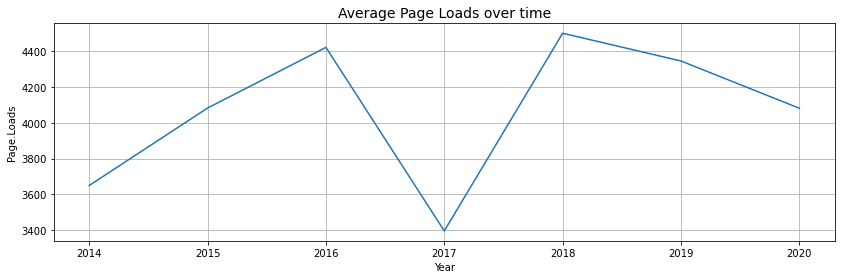

In [15]:
df2 = df.copy()
df2 = df2.sort_values('Date')
page_loads_mean = df2.groupby('Year')['Page.Loads'].mean()

fig = plt.figure(figsize=(14,4))
plt.grid()
sns.lineplot(x=page_loads_mean.index, y=page_loads_mean)
# sns.scatterplot(data=df2, x='Date', y='Page.Loads');
plt.title('Average Page Loads over time', fontsize=14)
plt.show()

#### Time Series Analysis
Conducted time series analysis on the 'Unique.Visits' column to identify trends, patterns, and seasonality in web traffic over time.

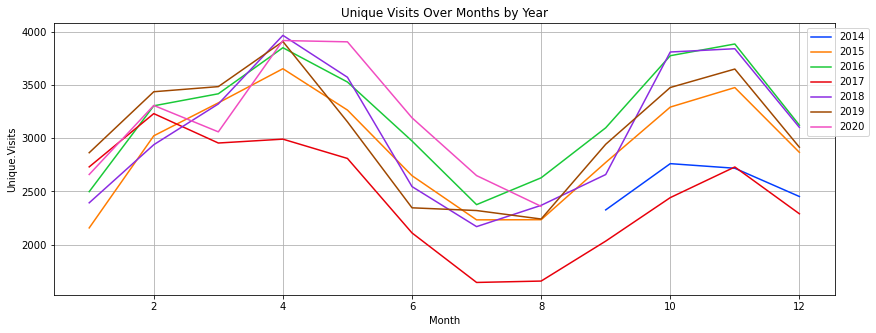

In [16]:
mean_visits_by_year = df.groupby(['Year', 'Month'])['Unique.Visits'].mean().reset_index()

fig = plt.figure(figsize=(14,5))
fig = plt.grid()
sns.lineplot(data=mean_visits_by_year, x='Month', y='Unique.Visits', hue='Year', palette='bright')
plt.title('Unique Visits Over Months by Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right')
plt.show()

#### Day of Week Analysis
Investigated how web traffic varies based on the day of the week ('Day.Of.Week'). Created visualizations, such as bar charts or line plots, to illustrate the trends.

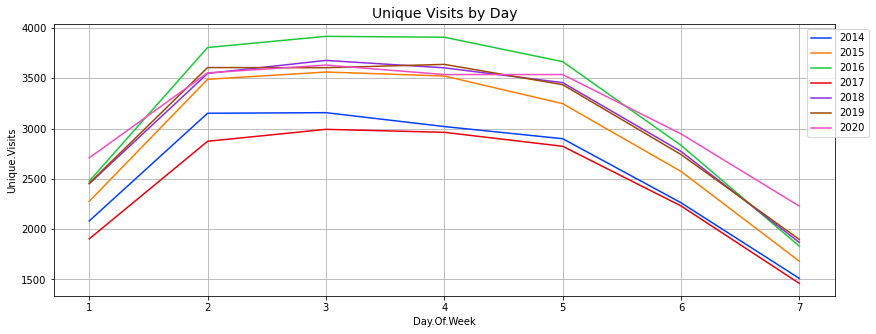

In [17]:
mean_visits_by_day = df.groupby(['Day.Of.Week', 'Year'])['Unique.Visits'].mean().reset_index()

fig = plt.figure(figsize=(14,5))
plt.grid()
sns.lineplot(data=mean_visits_by_day, x='Day.Of.Week', y='Unique.Visits', hue='Year', palette='bright')
plt.title('Unique Visits by Day', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right')
plt.show()

#### Page Loads vs. Unique Visits
Explored the relationship between 'Page.Loads' and 'Unique.Visits' to understand if there's a correlation. Utilized scatter plots or correlation coefficients for analysis.

Correlation Coefficient: 0.99


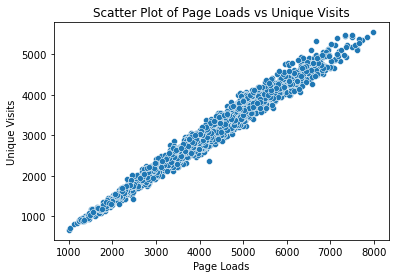

In [109]:
correlation = df['Page.Loads'].corr(df['Unique.Visits'])
print(f'Correlation Coefficient: {correlation:.2f}')

sns.scatterplot(data=df, x='Page.Loads', y='Unique.Visits')
plt.title('Scatter Plot of Page Loads vs Unique Visits')
plt.xlabel('Page Loads')
plt.ylabel('Unique Visits')
plt.show()

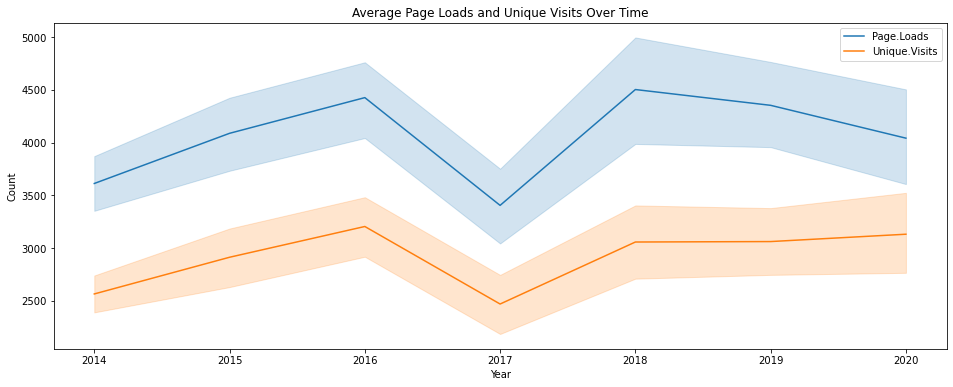

In [27]:
fig = plt.figure(figsize=(16, 6))
# sns.lineplot(data=df, x='Date', y='Page.Loads', label='Page.Loads')
# sns.lineplot(data=df, x='Date', y='Unique.Visits', label='Unique.Visits')

temp_group_df = df.groupby(['Year','Month'])[['Page.Loads', 'Unique.Visits']].mean().reset_index()
sns.lineplot(data=temp_group_df, x=temp_group_df['Year'], y='Page.Loads', label='Page.Loads')
sns.lineplot(data=temp_group_df, x=temp_group_df['Year'], y='Unique.Visits', label='Unique.Visits')
plt.title('Average Page Loads and Unique Visits Over Time')
plt.ylabel('Count')
plt.legend()
plt.show()

## Machine Learning Model
#### Data Preprocessing
Preprocessed the data by normalizing relevant columns using StandardScaler. Created sequences for the LSTM model with a sequence length of 7.

In [29]:
from sklearn.model_selection import train_test_split

features = ['Day.Of.Week', 'Date', 'Year', 'Month', 'DayMonth', 'Page.Loads', 'First.Time.Visits', 'Returning.Visits']
target = 'Unique.Visits'

choice = 1
if choice==1:
    # splitting process
    df = df[features+[target]]
    total_rows = len(df)
    train_size = int(0.8 * total_rows)
    test_size = int(0.2 * total_rows)
    # Split the data
    train_data = df.iloc[:train_size]
    validation_data = df.iloc[train_size:test_size//2]
    test_data = df.iloc[train_size+(test_size//2):]
    # data copy
    data = train_data.copy()

elif choice==2:
    # splitting the dataset into train, validation and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.1, random_state=42)
    # X_train, X_temp, y_train, y_temp = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
    # X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)   # val set has been moved
    data = pd.merge(X_train, y_train, left_index=True, right_index=True)
    print((X_train.shape, y_train.shape), (X_test.shape, y_test.shape))   # (X_val.shape, y_val.shape),
data.head(3)    # training data

,Day.Of.Week,Date,Year,Month,DayMonth,Page.Loads,First.Time.Visits,Returning.Visits,Unique.Visits
0,1,2014-09-14,2014,9,14,2146,1430,152,1582
1,2,2014-09-15,2014,9,15,3621,2297,231,2528
2,3,2014-09-16,2014,9,16,3698,2352,278,2630


## LSTM Model Training
Implemented LSTM model using PyTorch for time series prediction. Trained the model on the first 90% of the sorted dataset and evaluated its performance on the remaining 10%.

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import torch.nn.functional as F


# Sort by date
data = data.sort_values('Date')
data = data.drop('Date', axis=1)
if 'Date' in features:
    features.remove('Date')
# Normalize the data
scaler = StandardScaler()
# data[['Day.Of.Week', 'Page.Loads', 'First.Time.Visits', 'Returning.Visits']] = scaler.fit_transform(data[['Day.Of.Week', 'Page.Loads', 'First.Time.Visits', 'Returning.Visits']])
data[['Page.Loads', 'First.Time.Visits', 'Returning.Visits', 'Unique.Visits']] = scaler.fit_transform(data[['Page.Loads', 'First.Time.Visits', 'Returning.Visits', 'Unique.Visits']])


# Create sequences for the LSTM
sequence_length = 7

def get_time_sequence(data):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data.iloc[i:i+sequence_length][features].values)
        y.append(data.iloc[i+sequence_length][target])
    X, y = np.array(X), np.array(y)
    # Convert to PyTorch tensors
    X_tensor = torch.FloatTensor(X)
    y_tensor = torch.FloatTensor(y)
    return X_tensor, y_tensor

# # Train-test split
# X_train, X_val, y_train, y_val = train_test_split(X_tensor, y_tensor, test_size=0.1, random_state=42) # Validation set instead here
train_x_tensor, train_y_tensor = get_time_sequence(data)
val_x_tensor, val_y_tensor = get_time_sequence(data)
# Create DataLoader
train_dataset = TensorDataset(train_x_tensor, train_y_tensor)
val_dataset = TensorDataset(val_x_tensor, val_y_tensor)
# train_dataset = TensorDataset(X_train, y_train)
# train_dataset = TensorDataset(X_tensor, y_tensor)
# test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers, dropout):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers=num_layers, dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = F.relu(out[:, -1, :])  # Use the output of the last time step
        out = self.fc(out)
        return out
    # def forward(self, x):
    #     _, (h_n, _) = self.lstm(x)
    #     out = self.fc(h_n[-1])
    #     return out

# Instantiate the model
input_size = len(features)
hidden_size = 64
output_size = 1
num_layers = 2
dropout = 0.2

model = LSTMModel(input_size, hidden_size, output_size, num_layers, dropout)

# Define loss function and optimizer
# criterion = nn.MSELoss()
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [31]:
# Training the model
num_epochs = 200
losses = []
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
    losses.append(loss.item())
    if (epoch+1)%10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.2f}')

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:  # <- validation data
        outputs = model(inputs)
        test_loss = criterion(outputs.squeeze(), labels)

print(f'Val Loss: {test_loss.item():.2f}')

Epoch [10/200], Loss: 0.87
Epoch [20/200], Loss: 0.88
Epoch [30/200], Loss: 0.74
Epoch [40/200], Loss: 0.53
Epoch [50/200], Loss: 0.43
Epoch [60/200], Loss: 0.42
Epoch [70/200], Loss: 0.39
Epoch [80/200], Loss: 0.34
Epoch [90/200], Loss: 0.39
Epoch [100/200], Loss: 0.36
Epoch [110/200], Loss: 0.37
Epoch [120/200], Loss: 0.35
Epoch [130/200], Loss: 0.30
Epoch [140/200], Loss: 0.32
Epoch [150/200], Loss: 0.34
Epoch [160/200], Loss: 0.31
Epoch [170/200], Loss: 0.34
Epoch [180/200], Loss: 0.33
Epoch [190/200], Loss: 0.40
Epoch [200/200], Loss: 0.31
Val Loss: 0.31


## Results and Findings
#### Training Loss Curve
Plotted the training loss curve to monitor the convergence of the LSTM model during training.

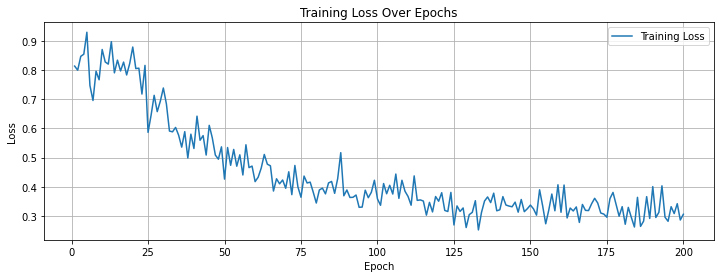

In [32]:
# Plot the training loss
fig = plt.figure(figsize=(12,4))
plt.grid()
plt.plot(range(1, num_epochs+1), losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

In [34]:
test_data.head()
# test_data.drop('Unique.Visits', axis=1)

,Day.Of.Week,Year,Month,DayMonth,Page.Loads,First.Time.Visits,Returning.Visits,Unique.Visits
1949,4,2020,1,15,-0.390112,-0.388345,-0.760107,-0.446212
1950,5,2020,1,16,-0.326954,-0.329535,-0.352995,-0.335892
1951,6,2020,1,17,-0.970561,-1.070535,-0.595530,-1.010491
1952,7,2020,1,18,-1.811661,-1.548362,-2.042077,-1.634369
1953,1,2020,1,19,-1.550008,-1.495433,-1.453064,-1.502492


## Predictions vs. Actual Values
Visualized the predicted 'Unique.Visits' against the actual values to assess the model's performance.

In [35]:
# evaluation mode
model.eval()

scaler_test = StandardScaler()
test_data[['Page.Loads', 'First.Time.Visits', 'Returning.Visits', 'Unique.Visits']] = scaler_test.fit_transform(test_data[['Page.Loads', 'First.Time.Visits', 'Returning.Visits', 'Unique.Visits']])

test_sequences = []
for i in range(len(test_data) - sequence_length):
    test_sequences.append(test_data.iloc[i:i+sequence_length][features].values)
# Convert to PyTorch tensor
test_sequences_tensor = torch.FloatTensor(np.array(test_sequences))

# predictions
if 'Date' in test_data.columns:
    test_data = test_data.sort_values('Date')
    test_data = test_data.drop('Date', axis=1)
# test_x_np = np.array(test_data.drop('Unique.Visits', axis=1))
# test_x_np = test_x_np.reshape(test_x_np.shape[0], -1)
test_y_np = np.array(test_data['Unique.Visits'])
# test_x = np.array()
# test_y = np.array()
with torch.no_grad():
    # all_inputs = torch.FloatTensor(X)
    # all_inputs = torch.FloatTensor(test_x_np)
    test_sequences_tensor = test_sequences_tensor.view(-1, sequence_length, input_size)
    all_predictions = model(test_sequences_tensor)
predictions_np = all_predictions.squeeze().numpy().reshape(-1, 1).flatten()
actual_values_np = test_y_np.reshape(-1, 1).flatten()

# Converting the predictions and actual values to numpy arrays
# scaler_y = StandardScaler()
# scaler_y.fit(test_y_np.reshape(-1,1))
# scaler_y.fit(np.array(test_y_np).reshape(-1,1))
# predictions_np = scaler_test.inverse_transform(all_predictions.squeeze().numpy().reshape(-1, 1)).flatten()

# predictions_np = all_predictions.squeeze().numpy().reshape(-1, 1).flatten()
# actual_values_np = test_y_np.reshape(-1,1).flatten()

# actual_values_np = np.array(test_y_np).reshape(-1,1).flatten()

# print(predictions_np.squeeze()[:3], actual_values_np[:3])

In [45]:
train_data['Year'].unique(), test_data['Year'].unique()

(array([2014, 2015, 2016, 2017, 2018, 2019], dtype=int64),
 array([2020], dtype=int64))

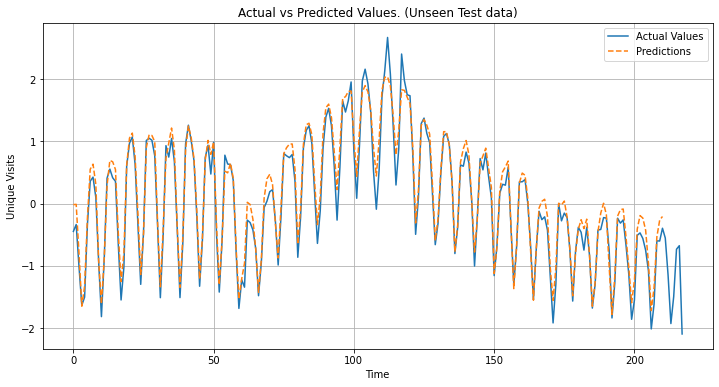

In [40]:
# Plot the actual values and predictions
fig = plt.figure(figsize=(12,6))
fig = plt.grid()
plt.plot(actual_values_np, label='Actual Values', linestyle='-')
plt.plot(predictions_np.squeeze(), label='Predictions', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Unique Visits')
plt.title('Actual vs Predicted Values. (Unseen Test data)')
plt.legend()
plt.show()

## Conclusion
Summarized the key findings and insights derived from the analysis. Discussed the implications for web site optimization, user engagement strategies, and potential areas for further investigation.